Notebook zur Berechnung der Wölbschubspannungen in einem Rechteckquerschnitt
=======

<div style="background-color:lightblue;text-align:center"> 
Um den Code in einer Zelle auszuführen jeweils [Shift+Enter] drücken.
</div>


Benennung der Variablen
---------
Die Variablen sind entsprechend der gängigen Literatur benannt. Ein Unterstrich am Ende der variablen deutet an, dass es sich um eine numerische Variable handelt (mit Ausnahmen). Alle anderen Variablen werden als Sympy Symbole definiert, die Formeln sind demnach alle symbolische Formeln.'

In [45]:
import sympy as sp
from sympy.abc import phi
from IPython.display import display, Latex, Math
import math
import matplotlib.pyplot as plt
import numpy as np


# Querschnittswerte
h_ = 184
b_ = 184
t_s_ = 17
t_g_ = 16
E_ = 210000
G_ = 81000
l_ = 1
M_T_ = 1

#Sympy
y = sp.Symbol('y')
z = sp.Symbol('z')
h = sp.Symbol('h')
t_s = sp.Symbol('t_s')
b = sp.Symbol('b')
t_g = sp.Symbol('t_g')
x = sp.Symbol('x')
M_T = sp.Symbol('M_T')
m_T = sp.Symbol('m_T')
E = sp.Symbol('E')
G = sp.Symbol('G')
l = sp.Symbol('l')
C1 = sp.Symbol('C1')
C2 = sp.Symbol('C2')
C3 = sp.Symbol('C3')
C4 = sp.Symbol('C4')
C5 = sp.Symbol('C5')
C6 = sp.Symbol('C6')

def get_val(Sympy_expression, **kwargs):
    Sympy_expression = Sympy_expression.evalf(subs={h:h_, b:b_, t_s:t_s_, t_g:t_g_, E:E_, G:G_})
    for key in kwargs:
        Sympy_expression = Sympy_expression.eval(subs={key:kwargs[key]})
    # display(Sympy_expression)
    return Sympy_expression


Querschnittswerte
----
Einheitsverwölbung $\varphi$ (wölbordinate).

In [46]:
phi = -y*z*(h/t_s - b/t_g)/(h/t_s + b/t_g)
get_val(phi)
# sp.Eq(sp.abc.phi,phi)

0.0303030303030303*y*z

Wölbwiderstand $I_{\omega}$ (Wölbflächenmoment 2. Grades). <br>
Im Skript mit $A_{ww}$ bezeichnet

In [47]:
I_w_vert = sp.integrate(phi**2,(z,-h/2,h/2))*t_s
i_w_hori = sp.integrate(phi**2,(y,-b/2,b/2))*t_g

I_w = I_w_vert.subs(y,-b/2) + I_w_vert.subs(y,b/2) + i_w_hori.subs(z,-h/2) + i_w_hori.subs(z,h/2)

get_val(I_w)*1e-6

266.295564929293

$I_{\omega}$ kann auch direkt mit der folgenden Formel bestimmt werden.

In [48]:
I_test = 1/24 * b**2 * h**2 * ((h/t_s - b/t_g)/(h/t_s + b/t_g))**2 * (t_s*h + t_g*b)
# I_test = I_test.evalf(subs={b:b_, h:h_, t_s:t_s_, t_g:t_g_})
get_val(I_test-I_w)

-1.47823733770032e-8

Torsionsträgheitsmoment $I_T$

In [49]:
I_T = (2*b**2*h**2)/(h/t_s + b/t_g)
# I_T_ = I_T.evalf(subs={b:b_, h:h_, t_s:t_s_, t_g:t_g_})
get_val(I_T)

102692429.575758

Berchnung von $\lambda$ und $\varepsilon$, falls letzteres kleiner als 10 ist kann Wölbkrafttorsion theoretisch vernachlässigt werden

In [50]:
lamb = sp.sqrt((G*I_T)/(E*I_w))
epsilon = lamb * l
get_val(epsilon)

0.385673775890542*l

DGL und Lösung
------
Zunächst wird die Lösung der Verdrehung $\vartheta$ und die Ableitungen definiert.

In [51]:
#DGL für konstantes M_T
# theta = C1*sp.exp(lamb*x) + C2*sp.exp(-lamb*x) + C3 + M_T/(G*I_T)*x
# theta_r = C4*sp.exp(lamb*x) + C5*sp.exp(-lamb*x) + C6 + M_T/(G*I_T)*x

#DGL für konstantes m_T
theta = C1*sp.sinh(lamb*x )+ C2*sp.cosh(lamb*x) + C3*x + C4 - m_T/(2*G*I_T)*x**2

#Ableitungen
d_theta = sp.diff(theta, x)
# d_theta_r = sp.diff(theta_r, x)
dd_theta = sp.diff(theta, x, 2)
ddd_theta = sp.diff(theta, x, 3)
dddd_theta = sp.diff(theta, x, 4)

get_val(theta)

C1*sinh(9*sqrt(1190)*x/805) + C2*cosh(9*sqrt(1190)*x/805) + C3*x + C4 - 6.01099762823223e-14*m_T*x**2

Im nächsten Schritt werden die Konstanten bestimmt. Als Beispiel dient ein Beidseitig voll eingespannter Balken mit einem konstanten Streckenmoment $m_T$ als Belastung. Die Randbedingungen sind in den Gleichungen bereits mit berücksichtigt. Um das Gleichungssystem lösen zu können werden mit get_val() die meisten Variablen durch numerische Werte ersetzt.

In [52]:
lamb= get_val(lamb)
theta_ = get_val(theta)
d_theta_ = get_val(d_theta)

Gleichungen = [theta_.evalf(subs={x:0}), d_theta_.evalf(subs={x:0}), theta_.evalf(subs={x:l_}), d_theta_.evalf(subs={x:l_})]

C_vals = sp.solve(Gleichungen, [C1, C2, C3, C4], dict=True)


d_theta_ = get_val(d_theta_).evalf(subs={C1:C_vals[0][C1], C2:C_vals[0][C2], C3:C_vals[0][C3], C4:C_vals[0][C4]})
dd_theta_ = get_val(dd_theta).evalf(subs={C1:C_vals[0][C1], C2:C_vals[0][C2], C3:C_vals[0][C3], C4:C_vals[0][C4]})
ddd_theta_ = get_val(ddd_theta).evalf(subs={C1:C_vals[0][C1], C2:C_vals[0][C2], C3:C_vals[0][C3], C4:C_vals[0][C4]})
dddd_theta_ = get_val(dddd_theta).evalf(subs={C1:C_vals[0][C1], C2:C_vals[0][C2], C3:C_vals[0][C3], C4:C_vals[0][C4]})
# get_val(C_vals[0][C4])
# C_vals = sp.solve([theta.evalf(subs={x:0}), d_theta.evalf(subs={x:0}), theta.evalf(subs={x:l_/2})-theta_r.evalf(subs={x:l_/2}), d_theta.evalf(subs={x:l_/2})-d_theta_r.evalf(subs={x:l_/2}), theta_r.evalf(subs={x:l_}), theta_r.evalf(subs={x:l_})], [C1, C2, C3, C4, C5, C6], dict=True)
# theta = theta.subs({C1:C_vals[0][C1], C2:C_vals[0][C2], C3:C_vals[0][C3]})

Schnittgrößen
------
Momente in Abhängigkeit von m_T und x

In [53]:
M_Ts_ = -get_val(E*I_w)*ddd_theta_
M_Tp_ = get_val(G*I_T)*d_theta_
M_w_ = -get_val(E*I_w)*dd_theta_
M_ges_ = M_Tp_ + M_Ts_

m_Tp_ = -get_val(G*I_T)*dd_theta_
m_Ts_ = get_val(E*I_w)*dddd_theta_
m_ges_ = m_Tp_ + m_Ts_

x_ = 0        # 0 <= x <= 1

display(sp.Eq(sp.Symbol(f'M_Tp(X={x_}L)'),M_Tp_.evalf(subs={x:x_})))
display(sp.Eq(sp.Symbol(f'M_Ts(X={x_}L)'),M_Ts_.evalf(subs={x:x_})))
display(sp.Eq(sp.Symbol(f'M_w(X={x_}L)'),M_w_.evalf(subs={x:x_})))
display(sp.Eq(sp.Symbol(f'M_ges(X={x_}L)'),M_ges_.evalf(subs={x:x_})))

display(sp.Eq(sp.Symbol(f'm_ges(X={x_}L)'),m_ges_.evalf(subs={x:x_})))

Eq(M_Tp(X=0L), 3.33066907387547e-16*m_T)

Eq(M_Ts(X=0L), 0.500000000001642*m_T)

Eq(M_w(X=0L), -0.0831274730137377*m_T)

Eq(M_ges(X=0L), 0.500000000001643*m_T)

Eq(m_ges(X=0L), 1.0*m_T)

Um die Wölbschubspannungen bestimmen zu können muss das statische Wölbmoment $S_\omega$ definiert werden.

In [54]:
S_w_s_ = get_val(sp.integrate(phi,z)*t_s)
S_w_g_ = get_val(sp.integrate(phi,y)*t_g)

S_w = sp.Piecewise((S_w_s_, abs(y)>=b_/2), (S_w_g_, True))
# S_w = sp.lambdify([y,z], S_w, math)


# S_w(h_/2,b_/2)

Spannungen:

In [55]:
x_ = 0          # 0 <= x_ <= 1
y_ = b_/2
z_ = h_/2
t_s_ = 17

tau_SV_ = get_val((M_Tp_/(2*h_*b_*min(t_s_, t_g_))))
display(sp.Eq(sp.Symbol(f'tau_sv(X={x_}L)'),tau_SV_.evalf(subs={y:y_, z:z_, x:0})))

tau_w_ = get_val((M_Ts_/I_w*t_s_) * (S_w))
display(sp.Eq(sp.Symbol(f'tau_w(X={x_}L)'),tau_w_.evalf(subs={y:y_, z:z_, x:0})))

sig_w_ = - M_w_/get_val(I_w) * get_val(phi)
display(sp.Eq(sp.Symbol(f'sigma_w(X={x_}L)'),sig_w_.evalf(subs={y:y_, z:z_, x:x_})))

Eq(tau_sv(X=0L), 3.17637355220363e-22*m_T)

Eq(tau_w(X=0L), 0.0064021148393405*m_T)

Eq(sigma_w(X=0L), 8.00649358411887e-8*m_T)

In [56]:
def get_np_vals(sp_expr, x_np, yzm):
    sp_lambdified = sp.lambdify((x, y, z, m_T),sp_expr, 'numpy')
    np_arr = sp_lambdified(x_np,**yzm)
    return np_arr

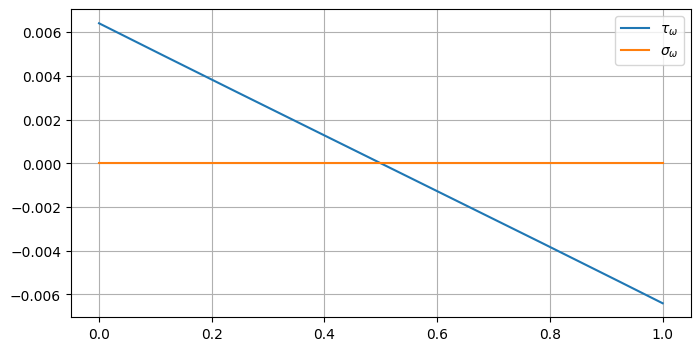

In [57]:
x_np = np.mgrid[0:l_:501j]
yzm = {'y':b_/2, 'z':h_/2, 'm_T':1}
tau_SV_np = get_np_vals(tau_SV_,x_np,yzm)
tau_w_np = get_np_vals(tau_w_,x_np,yzm)
sig_w_np = get_np_vals(sig_w_,x_np,yzm)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
# ax.plot(x_np,tau_SV_np, label='$\\tau_{SV}$')
ax.plot(x_np,tau_w_np, label='$\\tau_{\omega}$')
ax.plot(x_np,sig_w_np, label='$\sigma_{\omega}$')
ax.grid(True,'major')
ax.legend()


In [29]:
# p1 = sp.plotting.plot(ddd_theta_)

In [30]:
phi.evalf(subs={y:b_/2, z:h_/2, b:b_, h:h_, t_s:t_s_, t_g:t_g_})

256.484848484848